Sentence: "The queen who travelled across the vast kingdom governs wisely"
Tokens (10): ['the', 'queen', 'who', 'travelled', 'across', 'the', 'vast', 'kingdom', 'governs', 'wisely']



              TASK 2: SELF-ATTENTION                 
A. Embeddings Matrix Size (Sequence x Dim): (10, 4)
B. Raw Attention Scores Matrix Size: (10, 10)
C. Self-Attention Weights Matrix (Softmax Applied):
   Attention Weights for 'queen' (row 1):
[4.01393384e-03 9.78861392e-01 1.32954363e-03 3.84562752e-03
 1.80293078e-04 4.01393384e-03 3.69088836e-03 8.06752131e-04
 5.56583164e-05 3.20197754e-03]


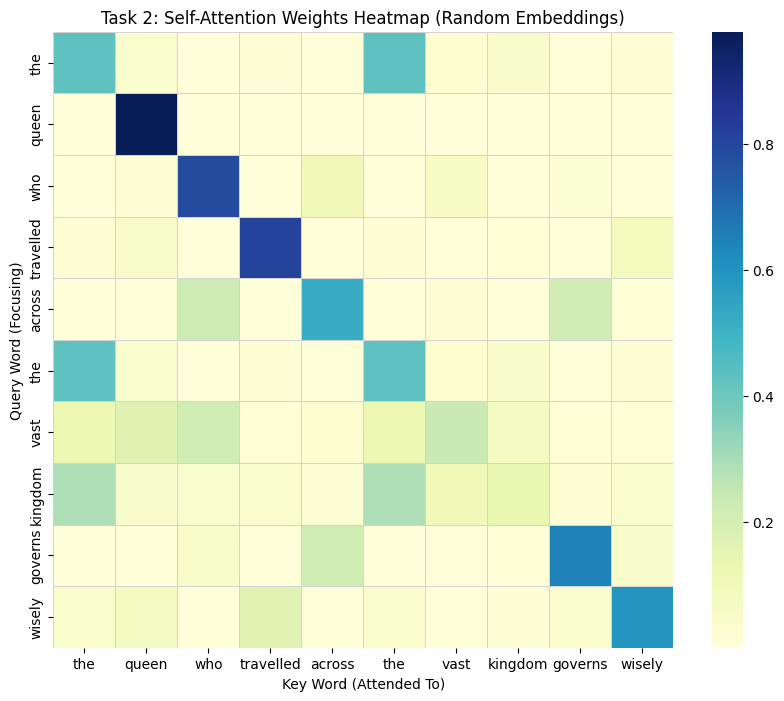


Interpretation: The heatmap shows diverse, non-uniform scores, confirming that attention calculates unique relevance for every possible word pair, regardless of distance. This is the mechanism that allows models to capture long-range dependencies like 'queen' -> 'governs'.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Input Data ---
SENTENCE = "The queen who travelled across the vast kingdom governs wisely"

# 1. Tokenize the sentence (simple split and cleanup)
def tokenize(sentence):
    # Remove punctuation (optional, but good practice for simple tokenization)
    clean_sentence = re.sub(r'[^\w\s]', '', sentence)
    return clean_sentence.lower().split()

tokens = tokenize(SENTENCE)
N = len(tokens)
print(f"Sentence: \"{SENTENCE}\"")
print(f"Tokens ({N}): {tokens}\n")

# 2. Build a vocabulary (since tokens are unique, vocabulary is the set of tokens)
vocab = sorted(list(set(tokens)))
vocab_size = len(vocab)
token_to_index = {token: i for i, token in enumerate(vocab)}

# --- Task 2: Self-Attention ---
print("\n\n=====================================================")
print("              TASK 2: SELF-ATTENTION                 ")
print("=====================================================")

# 1. Assign random embeddings to each word
EMBEDDING_DIM = 4 # Define the size of the embedding vector
np.random.seed(42) # For reproducibility
# Create a dictionary to hold embeddings for each unique token
token_embeddings = {
    token: np.random.randn(EMBEDDING_DIM) for token in vocab
}

# Construct the sequence matrix (E) for the input sentence
# Matrix size: (Sequence Length N) x (Embedding Dimension D) = 10x4.
E = np.array([token_embeddings[token] for token in tokens])

# For simplicity, Q, K, and V are the same input embeddings (E)
Q = E # Query matrix (N x D)
K = E # Key matrix (N x D)
V = E # Value matrix (N x D)

print(f"A. Embeddings Matrix Size (Sequence x Dim): {Q.shape}")

# 2. Compute the dot-product score matrix
# Score = Q * K_transpose. This gives an (N x N) matrix of raw attention scores.
# This matrix represents the *raw* relevance of every word (row) to every other word (column).
attention_scores = np.dot(Q, K.T)

print(f"B. Raw Attention Scores Matrix Size: {attention_scores.shape}")

# 3. Apply softmax row-wise
# Softmax turns the raw scores into probability distributions, summing to 1 for each row.
# Each row shows how much the word in that row 'attends' to every other word in the sentence.
attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)

print("C. Self-Attention Weights Matrix (Softmax Applied):")
# Print the attention focus of the word 'queen' (index 1 in the token list)
queen_index = tokens.index('queen')
print(f"   Attention Weights for 'queen' (row {queen_index}):")
print(attention_weights[queen_index])


# 4. Visualize the attention matrix as a heatmap
plt.figure(figsize=(10, 8))
# Use the tokens list (length N=10) for labels
sns.heatmap(attention_weights, annot=False, cmap="YlGnBu",
            xticklabels=tokens, yticklabels=tokens, linewidths=.5, linecolor='lightgray')
plt.title(f'Task 2: Self-Attention Weights Heatmap (Random Embeddings)')
plt.ylabel('Query Word (Focusing)')
plt.xlabel('Key Word (Attended To)')
plt.show()

print("\nInterpretation: The heatmap shows diverse, non-uniform scores, confirming that attention calculates unique relevance for every possible word pair, regardless of distance. This is the mechanism that allows models to capture long-range dependencies like 'queen' -> 'governs'.")